# Human Factors Prediction Model (LSTM => ASRS)

## Import Notebook

In [18]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

In [20]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
asrs_df.sort_values(by='date', ascending=False, inplace=True)
asrs_df = asrs_df.head(100)

ls_version = 1

## ASRS + LS(Asrs)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (100, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


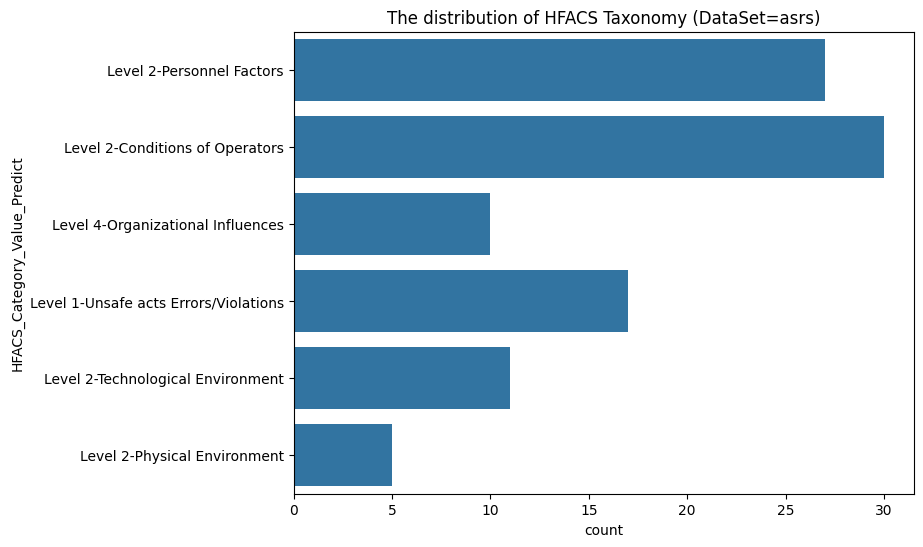

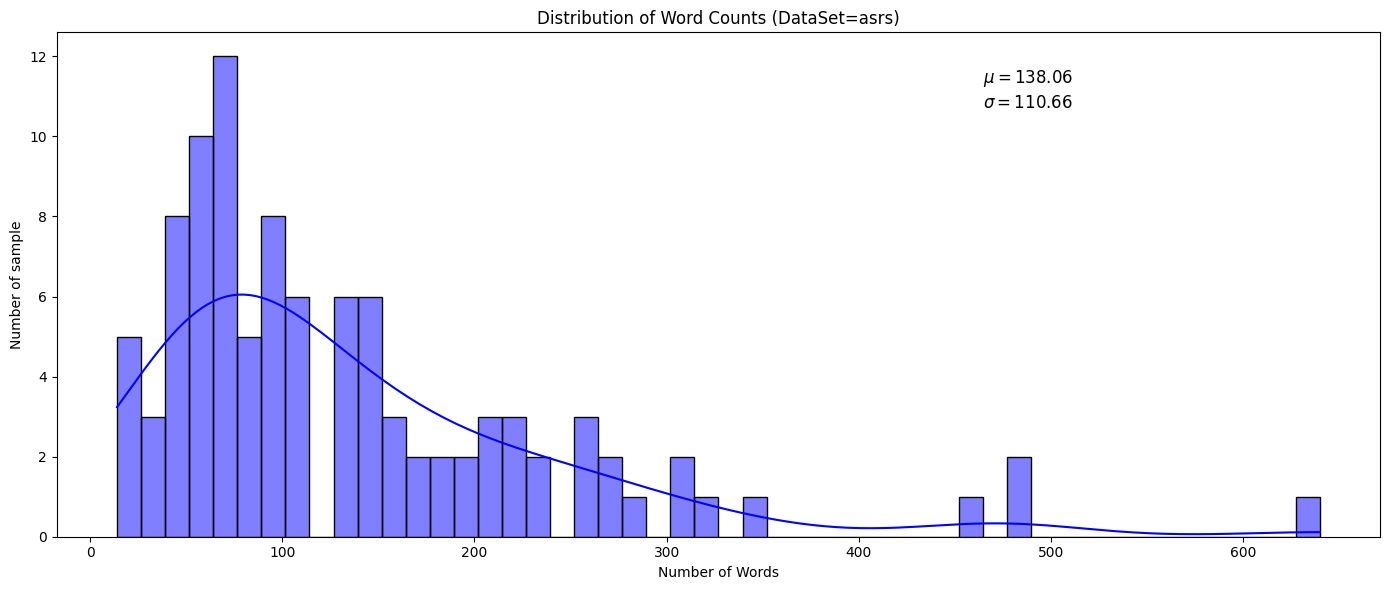

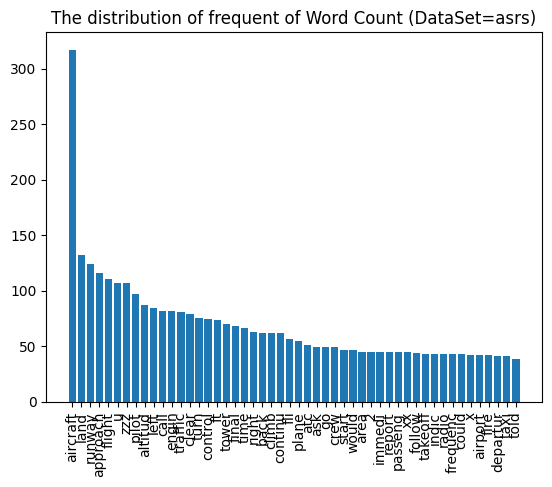

Total unique words: 2386
Define Y
Shape of label tensor: (100,)
Define X
Found 2387 unique tokens.
Shape of data tensor: (100, 200)
(80, 200) (80,)
(20, 200) (20,)
2    7
4    3
3    3
1    3
5    2
0    2
Name: count, dtype: int64
1    27
2    20
0    15
4     8
5     8
3     2
Name: count, dtype: int64
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 457ms/step - accuracy: 0.2205 - loss: 1.8019 - val_accuracy: 0.1250 - val_loss: 1.8027
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2834 - loss: 1.7992 - val_accuracy: 0.2500 - val_loss: 1.8022
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.2630 - loss: 1.7988 - val_accuracy: 0.2500 - val_loss: 1.8019
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.3368 - loss: 1.7964 - val_accuracy: 0.2500 - val_loss: 1.8014
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.4349 - loss: 1.7921 - val_accuracy: 0.2500 - val_loss: 1.8011
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


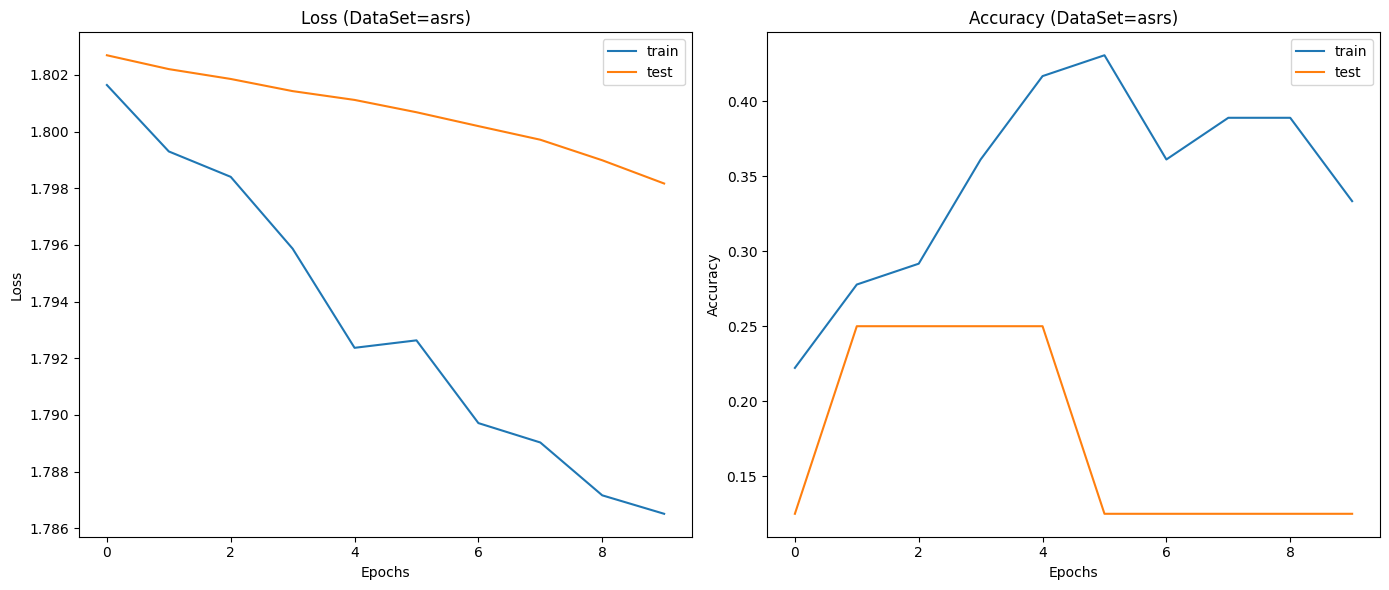

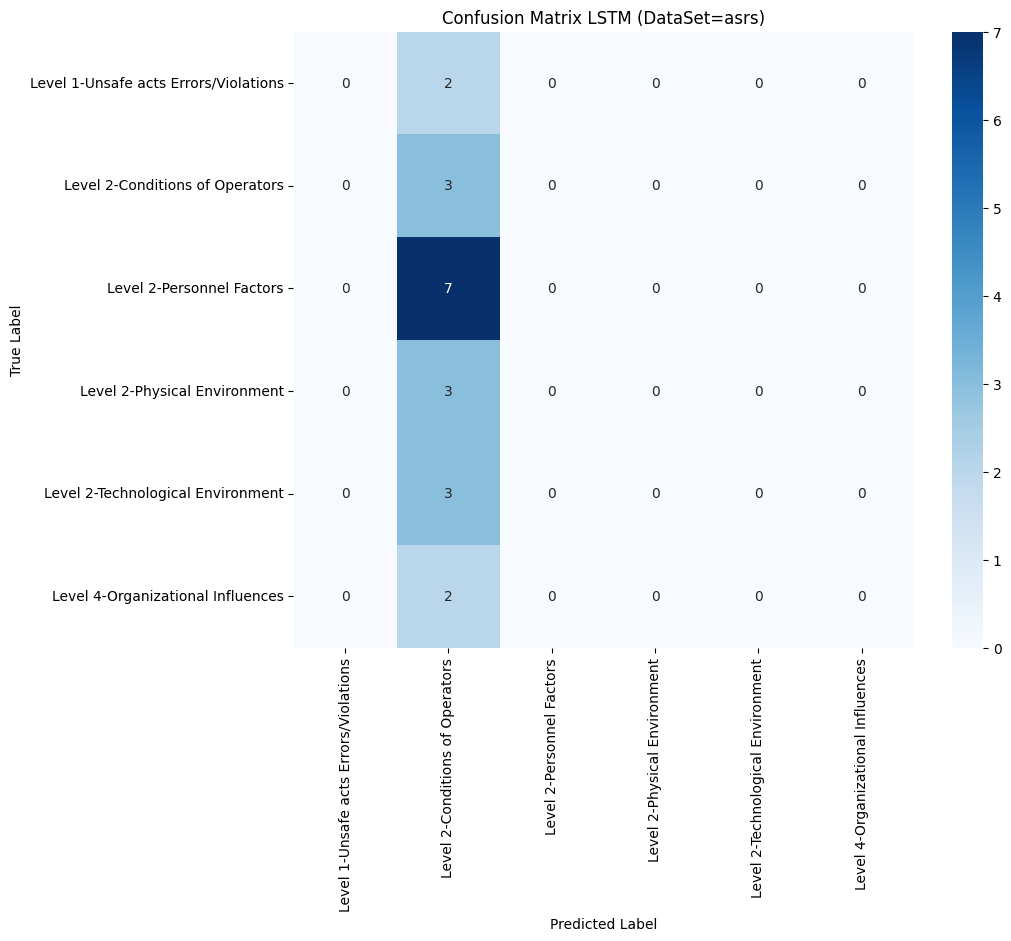

In [21]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs',
    "ls_version": ls_version
}

# 02. Train Model
dfs = { 'asrs': asrs_df.copy() }
lstm_ls_asrs_Model = LSTMModel(dfs, ds_name='asrs', options=options)
lstm_ls_asrs_Model.train()

# 03. Evaluate Model
evaluate_result = lstm_ls_asrs_Model.evaluate()

## ASRS + LS(Ntsb)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (100, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


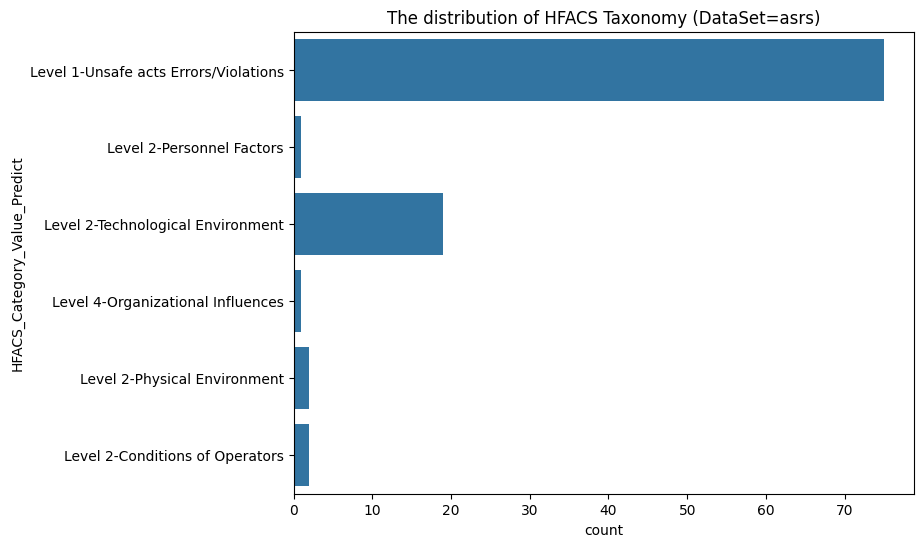

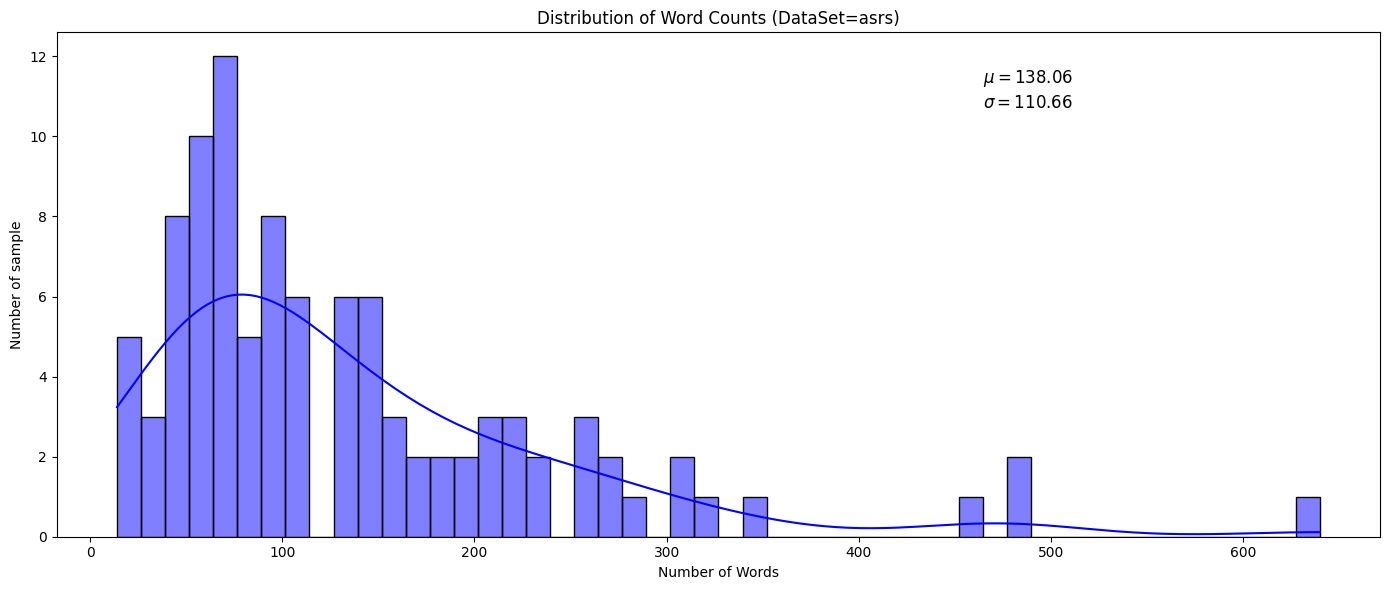

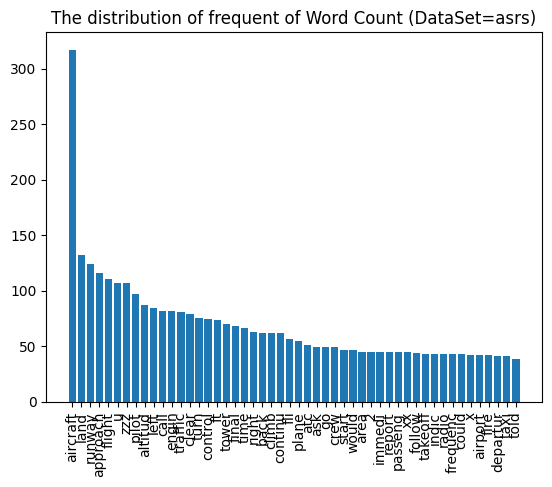

Total unique words: 2386
Define Y
Shape of label tensor: (100,)
Define X
Found 2387 unique tokens.
Shape of data tensor: (100, 200)
(80, 200) (80,)
(20, 200) (20,)
0    12
4     4
3     2
5     1
2     1
Name: count, dtype: int64
0    63
4    15
1     2
Name: count, dtype: int64
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 509ms/step - accuracy: 0.1723 - loss: 1.8035 - val_accuracy: 0.6250 - val_loss: 1.7957
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.3711 - loss: 1.7985 - val_accuracy: 0.7500 - val_loss: 1.7912
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.4657 - loss: 1.7941 - val_accuracy: 0.7500 - val_loss: 1.7866
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.6085 - loss: 1.7882 - val_accuracy: 0.7500 - val_loss: 1.7818
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.7600 - loss: 1.7809 - val_accuracy: 0.7500 - val_loss: 1.7766
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.7756 - loss: 1.7759 - val_

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


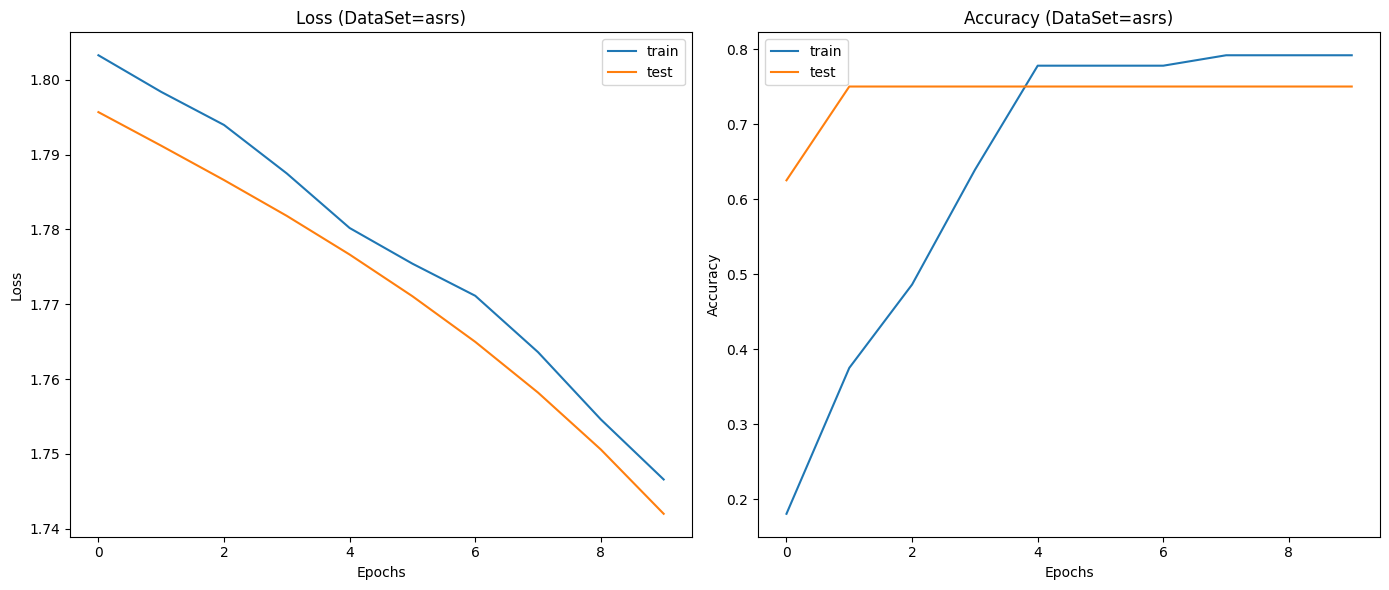

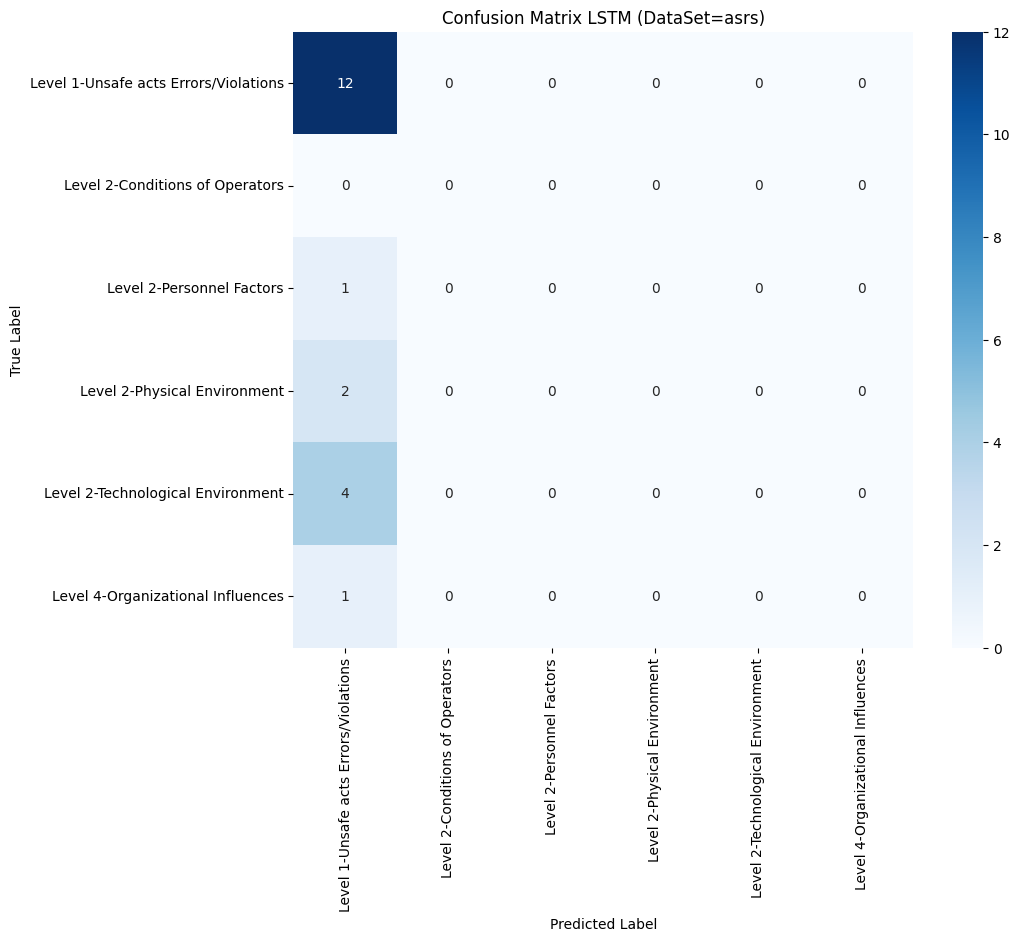

In [22]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'ntsb',
    "ls_version": ls_version
}

# 02. Train Model
dfs = { 'asrs': asrs_df.copy() }
lstm_ls_ntsb_Model = LSTMModel(dfs, ds_name='asrs', options=options)
lstm_ls_ntsb_Model.train()

# 03. Evaluate Model
evaluate_result = lstm_ls_ntsb_Model.evaluate()

## ASRS + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (100, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


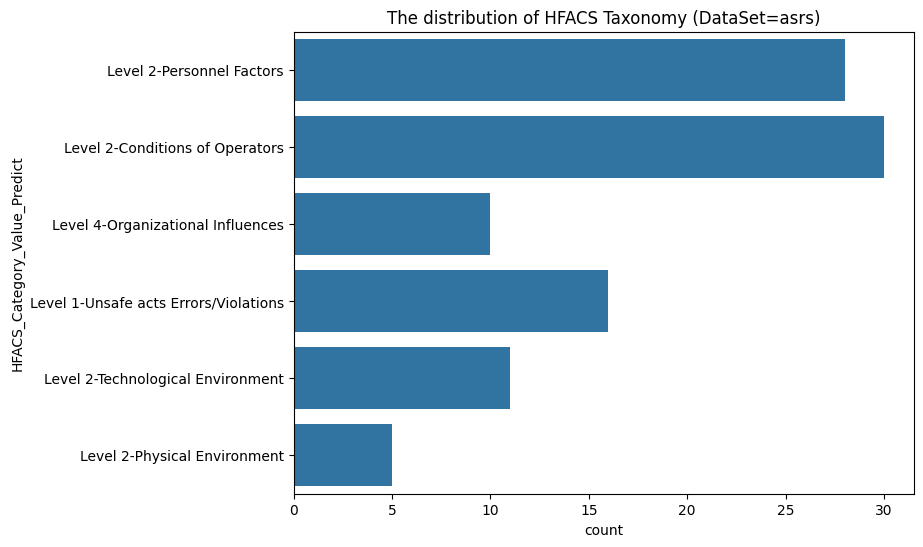

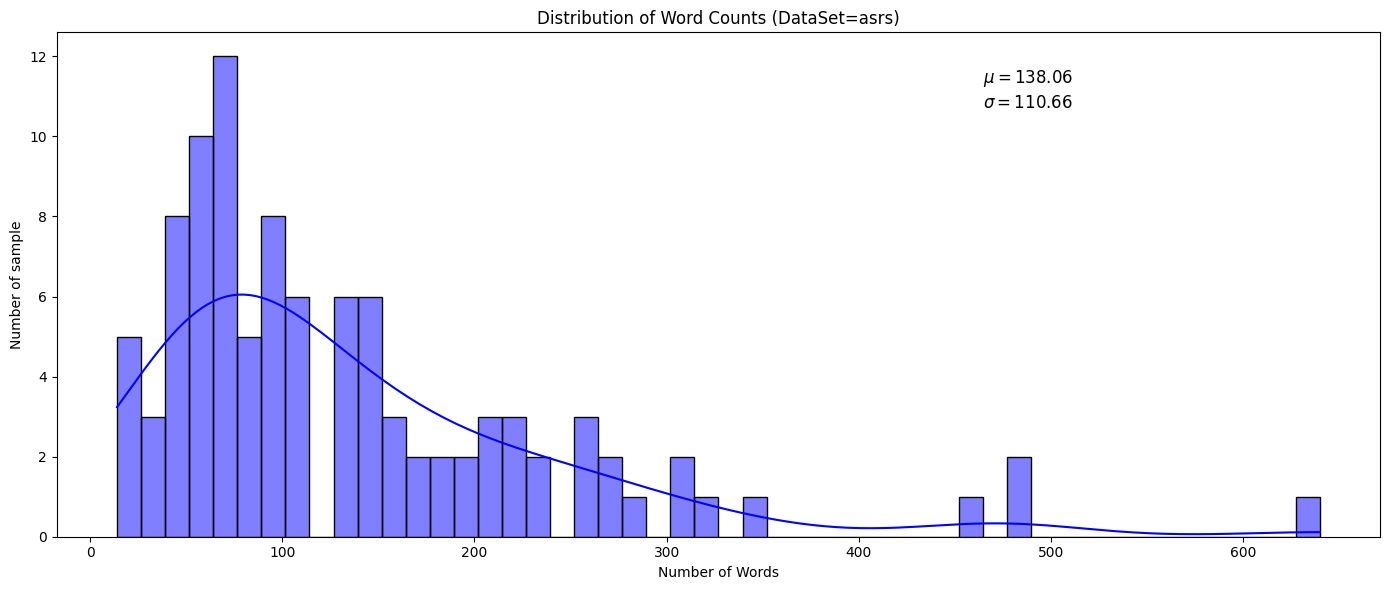

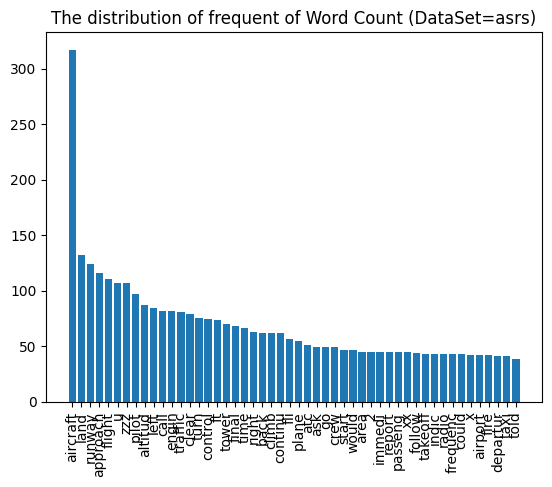

Total unique words: 2386
Define Y
Shape of label tensor: (100,)
Define X
Found 2387 unique tokens.
Shape of data tensor: (100, 200)
(80, 200) (80,)
(20, 200) (20,)
2    7
4    3
3    3
1    3
5    2
0    2
Name: count, dtype: int64
1    27
2    21
0    14
4     8
5     8
3     2
Name: count, dtype: int64
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.1337 - loss: 1.8026 - val_accuracy: 0.1250 - val_loss: 1.8017
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3129 - loss: 1.7995 - val_accuracy: 0.1250 - val_loss: 1.8013
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.2335 - loss: 1.7990 - val_accuracy: 0.2500 - val_loss: 1.8009
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3364 - loss: 1.7975 - val_accuracy: 0.2500 - val_loss: 1.8005
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.3368 - loss: 1.7960 - val_accuracy: 0.1250 - val_loss: 1.8002
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


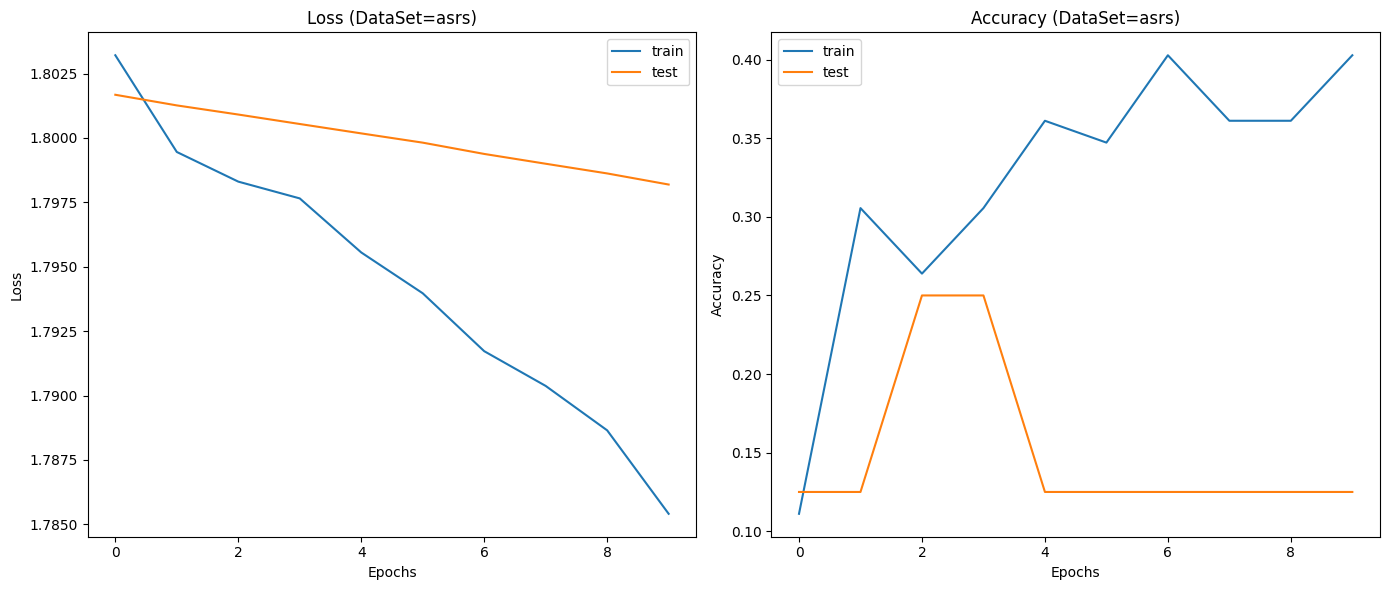

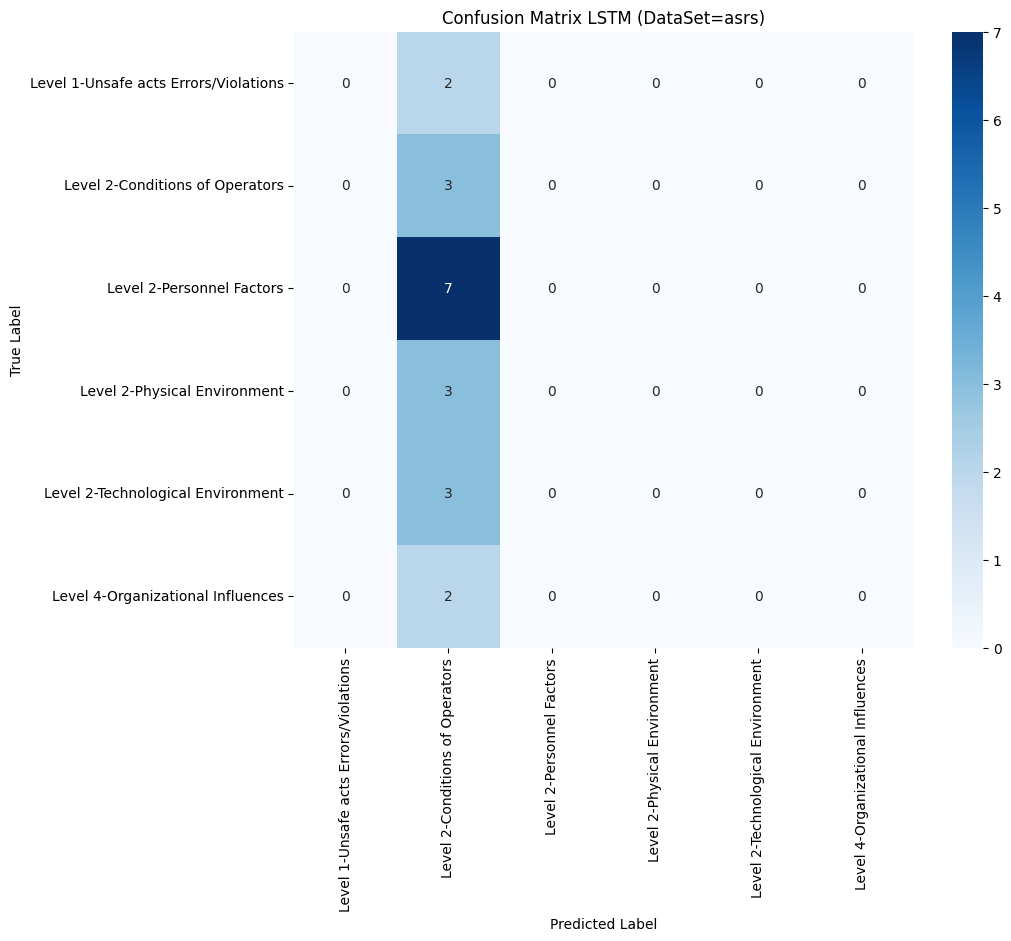

In [23]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs_ntsb',
    "ls_version": ls_version
}

# 02. Train Model
dfs = { 'asrs': asrs_df.copy() }
lstm_ls_hybrid_Model = LSTMModel(dfs, ds_name='asrs', options=options)
lstm_ls_hybrid_Model.train()

# 03. Evaluate Model
evaluate_result = lstm_ls_hybrid_Model.evaluate()

## Summary of Accuracy

In [24]:
# Show Accuracy
print('ASRS=========')
show_accuracy(lstm_ls_asrs_Model)
print('NTSB=========')
show_accuracy(lstm_ls_ntsb_Model)
print('ASRS_NTSB=========')
show_accuracy(lstm_ls_hybrid_Model)

ASRS=========
Accuracy: 15.00
Micro F1 Score: 15.00
Macro F1 Score: 4.35
Weighted F1 Score: 3.91
Hamming Loss: 0.8500
NTSB=========
Accuracy: 60.00
Micro F1 Score: 60.00
Macro F1 Score: 15.00
Weighted F1 Score: 45.00
Hamming Loss: 0.4000
ASRS_NTSB=========
Accuracy: 15.00
Micro F1 Score: 15.00
Macro F1 Score: 4.35
Weighted F1 Score: 3.91
Hamming Loss: 0.8500


## References

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html